In [13]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

# Data loading 

In [34]:
'''
Loading CIFAR-10 dataset. x_train and x_test are np arrays of shape [50000,32,32,3] and [10000,32,32,3] respectively.
y_train and y_test are np arrays of shape [50000,1] and [10000,1], respecectively. (Containing the integer labels 0-9 for the 
class of each image).
'''
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

NUM_CLASSES = 10
IMG_SHAPE = (x_train.shape[1],x_train.shape[2],x_train.shape[3])

print("x_train shape: "+str(x_train.shape))
print("x_test shape: "+str(x_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [35]:
'''
We are going to work with (-1,1) range values. The image data consists of integers between 0 and 255 for each pixel channel, 
so we need to divide by 255.
'''
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
'''
We also need to change the integer labeling of the images to One-Hot-Encoded vectors. If the class label of an image is i, 
One-Hot-Encoding is a vector of length 10, with 0s in all, except at the ith element, which is 1.
Now, y_train and y_test are therefore [50000,10] and [10000,10] respectively.
'''
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

# Building the Model

In [36]:
# We are going to use the Functional API

from keras.layers import Input, Flatten, Dense
from keras.models import Model

'''
This is our entry point into the network. We need to tell the network the shape o feach data element to expect as a tuple. 
IMG_SHAPE = (32,32,3)
'''

input_layer = Input(IMG_SHAPE) 

'''
We flatten the input into a vecor, using Flaten layer, with length 3072 (= 32x32x3). 
The reason we do this is because de subsequent Dense layer requieres flat inputs, not a mulidimensional array. 
Other layers types requiere multidimensional arrays as input. 
'''

x = Flatten()(input_layer)

'''
The Dense layer is perhaps the most fundamental layer type in any neural network. It contains a given number of unis that 
are densely connected to the previous layer. Every uni in the layer is coneced to every uni in the previous layer, through
a single conecction that carries a weigth (which can be possitive or negative). The output from a given unit is he weighted 
sum of the input it receives from he previous layer, whick is then passed through a nonlinear activation function before 
being sent to the following layer. The activation function is critical o ensure the neural network is able to learn complex
functions and doesn't just output a linear combination of its input.

ReLU: 0 IF NEGATIVE ELSE y=x
LeakyReLU: y=ax IF NEGATIVE ELSE y=x
sigmoid: 1/1+e^(-x)

The softmax activation is useful if you want the total sum of the output from the layer equal 1, for example, for multiclass
classif problems where each observation only belongs to exactly one class.--
'''
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer=Dense(units=10, activation='softmax')(x)
model= Model(input_layer, output_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_8 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [38]:
from keras.optimizers import Adam

'''
The optimizer is the algorithm that will be used to update the weights in the neural network based on the gradient
loss function. One of the most commonly used and stable optimizers is Adam. In most cases, you shouldn't need to tweak the
defaults parameters of the Adam optimizer, except the learning rate. The greater the learning rate, the larger the change
in weights at each training step. We have to fin the minima of the loss function. We want to tune or adjust this during the 
training.

The loss function is used by nn to compare its predicted output to ground truth. Its returns a single number for each 
observation. If this number is greater, the network perfomance is worse.
'''

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training Model

In [39]:
'''
The weights are initialized to small random values. 
At each training step, one batch of images is passed through the network and the errors are backpropagated to update weights.
The batch_size determines how many images are in each training stepbatch. The larger the batch size, the more stable
gradient calculation, but the slower each training step range (32,256) recomended. 
'''

model.fit(x_train # Raw data
         , y_train # One-Hot-Encoded class labels
         , batch_size = 32 # How many observations will be passed o the network at each training step
         , epochs = 10 # How many times the network will be shown the full training data
         , shuffle = True # If True, the batches will be drawn randomly without replacement 
          # from the training data at each training step.
         )


W1009 12:45:07.995323 140008108525376 deprecation.py:323] From /home/frm96/miniconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1009 12:45:08.041042 140008108525376 deprecation_wrapper.py:119] From /home/frm96/miniconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 10s 207us/step - loss: 1.8447 - acc: 0.3370
Epoch 2/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.6627 - acc: 0.4048
Epoch 3/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.5854 - acc: 0.4351
Epoch 4/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.5356 - acc: 0.4529
Epoch 5/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.4997 - acc: 0.4651
Epoch 6/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.4683 - acc: 0.4764
Epoch 7/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.4419 - acc: 0.4857
Epoch 8/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.4197 - acc: 0.4943
Epoch 9/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.4016 - acc: 0.4987
Epoch 10/10
50000/50000 [==============================] - 10s 191us/step - loss: 

'\nThe weights are initialized to small random values. \nAt each training step, one batch of images is passed through the network and the errors are backpropagated to update weights.\nThe batch_size determines how many images are in each training stepbatch. The larger the batch size, the more stable\ngradient calculation, but the slower each training step range (32,256) recomended. \n'

# Evaluating the Model

In [42]:
'''
We know the model achieves a acc of 50.62% on the training set, bu how does it perform on data it has never seen?
We can use the evaluate method provided by Keras.
Note that if the model was whessing randomly, it would achieve approximately 10% acc (bc there are 10 classes), so 50% 
is a good result given that we have used a very basic neural network.
'''

model.evaluate(x_test,y_test)

# We can view some of the predictions on the test set using the predict method
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # [1k,10] vector 10 classes prob for each observation
preds_single = CLASSES[np.argmax(preds,axis=-1)] # We convert this array of probs back into a single pred using np. 
# axis = -1 tells the function to collapse the array over the last dimension (class dimension) [1k,1]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]



10000/10000 [==============================] - 0s 33us/step


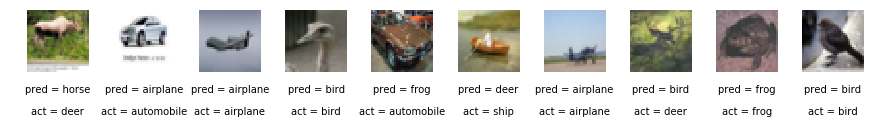

In [48]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
    